# World Wide Products Inc.

## Introduction


In [613]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from pmdarima import auto_arima 

#import warnings
#warnings.filterwarnings("ignore")

In [518]:
airline = pd.read_csv('/Users/anissakhan/Dropbox/Nissa_stuff/KU_CS/EECS731/731-Project-5-Khan/Data/RawData/HistoricalProductDemand.csv', index_col ='Date', parse_dates = True)

In [519]:
print(airline.index.freq)

None


In [520]:
df=pd.read_csv("/Users/anissakhan/Dropbox/Nissa_stuff/KU_CS/EECS731/731-Project-5-Khan/Data/RawData/HistoricalProductDemand.csv")
df

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500
...,...,...,...,...,...
1048570,Product_1791,Whse_J,Category_006,2016/4/27,1000
1048571,Product_1974,Whse_J,Category_006,2016/4/27,1
1048572,Product_1787,Whse_J,Category_006,2016/4/28,2500
1048573,Product_0901,Whse_J,Category_023,2016/10/7,50


In [521]:
df.dtypes

Product_Code        object
Warehouse           object
Product_Category    object
Date                object
Order_Demand        object
dtype: object

In [522]:
#new = df["Product_Code"].str.split("_", n = 1, expand = True)
#df["Code"]=new[1]

In [523]:
#new = df["Product_Category"].str.split("_", n = 1, expand = True)
#df["Category"]=new[1]
#df.head()

In [524]:
#df['Code'] = df['Code'].astype('float')
#df['Category'] = df['Category'].astype('float')
df['Warehouse'] = df['Warehouse'].astype('string')
df['Date'] = df['Date'].astype('string')
df['Product_Category'] = df['Product_Category'].astype('string')
df['Product_Code'] = df['Product_Code'].astype('string')
df.dtypes

Product_Code        string
Warehouse           string
Product_Category    string
Date                string
Order_Demand        object
dtype: object

In [525]:
df['Order_Demand'] = df['Order_Demand'].astype('string')

In [526]:
df.Order_Demand = df.Order_Demand.str.strip()

In [527]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Product_Code      1048575 non-null  string
 1   Warehouse         1048575 non-null  string
 2   Product_Category  1048575 non-null  string
 3   Date              1037336 non-null  string
 4   Order_Demand      1048575 non-null  string
dtypes: string(5)
memory usage: 40.0 MB


In [528]:
df.dropna(subset = ["Date"], inplace=True)
#df['Date']=df['Date'].str.replace("/","").astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037336 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Product_Code      1037336 non-null  string
 1   Warehouse         1037336 non-null  string
 2   Product_Category  1037336 non-null  string
 3   Date              1037336 non-null  string
 4   Order_Demand      1037336 non-null  string
dtypes: string(5)
memory usage: 47.5 MB


In [529]:
df=df.reset_index()
df.drop(columns =["index"], inplace = True)
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [530]:
count=0
for i in range(0,len(df['Order_Demand'])):
    if("(" in df['Order_Demand'][i]):
        df['Order_Demand'][i] = df['Order_Demand'][i].rstrip(")")
        df['Order_Demand'][i] = df['Order_Demand'][i].lstrip("(")
        df['Order_Demand'][i] = "-" + df['Order_Demand'][i]
        count=count+1
        #df.drop([i], inplace=True, axis=0)
        if(count<3):
            print(df.iloc[i])
            
print('Times Order_Demand variable is negative =', count)

Product_Code        Product_2169
Warehouse                 Whse_A
Product_Category    Category_024
Date                    2012/8/9
Order_Demand                  -1
Name: 112289, dtype: string
Product_Code        Product_2132
Warehouse                 Whse_A
Product_Category    Category_009
Date                   2012/11/1
Order_Demand                 -24
Name: 112306, dtype: string
Times Order_Demand variable is negative = 5899


In [531]:
df['Order_Demand'] = df['Order_Demand'].astype('float')

In [532]:
count=0
for i in range(0,len(df['Order_Demand'])):
    if(df['Order_Demand'][i] < 0):
        #print(df.iloc[i])
        #df.drop([i],inplace=True, axis=0)
        df['Order_Demand'][i] = (df['Order_Demand'][i])*(-1)
        count=count+1
        
            
print('Times Order_Demand variable is negative =', count)

<ipython-input-532-5b9b71c14f8d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order_Demand'][i] = (df['Order_Demand'][i])*(-1)


Times Order_Demand variable is negative = 5899


In [534]:
df.dtypes

Product_Code         string
Warehouse            string
Product_Category     string
Date                 string
Order_Demand        float64
dtype: object

In [536]:
df.Date = pd.to_datetime(df.Date, format='%y/%d/%m')
df.set_index('Date', inplace=True)

In [539]:
df['Year'] = df.index.year
df['Month'] = df.index.month
df['WeekdayName'] = df.index.dayofweek
df.head()

,Product_Code,Warehouse,Product_Category,Order_Demand,Year,Month,WeekdayName
Date,,,,,,,
2012-07-27,Product_0993,Whse_J,Category_028,100.0,2012,7,4
2012-01-19,Product_0979,Whse_J,Category_028,500.0,2012,1,3
2012-02-03,Product_0979,Whse_J,Category_028,500.0,2012,2,4
2012-02-09,Product_0979,Whse_J,Category_028,500.0,2012,2,3
2012-03-02,Product_0979,Whse_J,Category_028,500.0,2012,3,4


In [551]:
#df.loc['2012-01-17']

# Datasets for individual products

In [582]:
dfProd=df.query("Product_Code == 'Product_0704'")[['Product_Code', 'Warehouse', 'Product_Category', 'Order_Demand']]
dfProd.head()

,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2012-03-02,Product_0704,Whse_J,Category_001,1.0
2012-01-17,Product_0704,Whse_J,Category_001,10.0
2012-02-14,Product_0704,Whse_J,Category_001,10.0
2012-03-07,Product_0704,Whse_J,Category_001,10.0
2012-05-15,Product_0704,Whse_J,Category_001,10.0


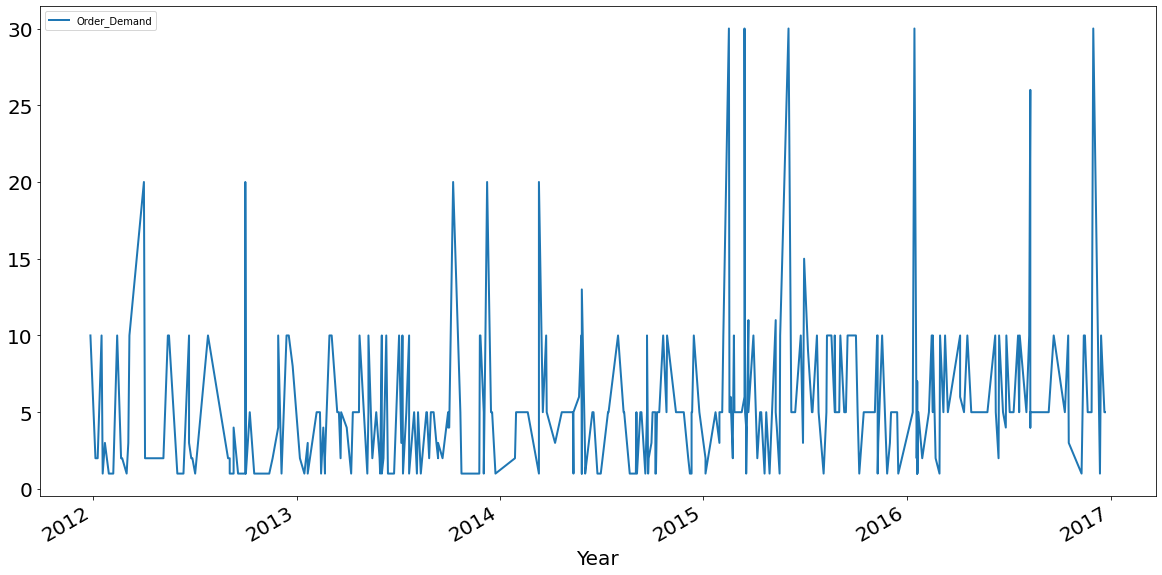

In [583]:
dfProd.plot(figsize=(20,10), linewidth=2, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [584]:
dfProd2=df.query("Product_Code == 'Product_0979'")[['Product_Code', 'Warehouse', 'Product_Category', 'Order_Demand']]
dfProd2.head()

,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2012-01-19,Product_0979,Whse_J,Category_028,500.0
2012-02-03,Product_0979,Whse_J,Category_028,500.0
2012-02-09,Product_0979,Whse_J,Category_028,500.0
2012-03-02,Product_0979,Whse_J,Category_028,500.0
2012-04-19,Product_0979,Whse_J,Category_028,500.0


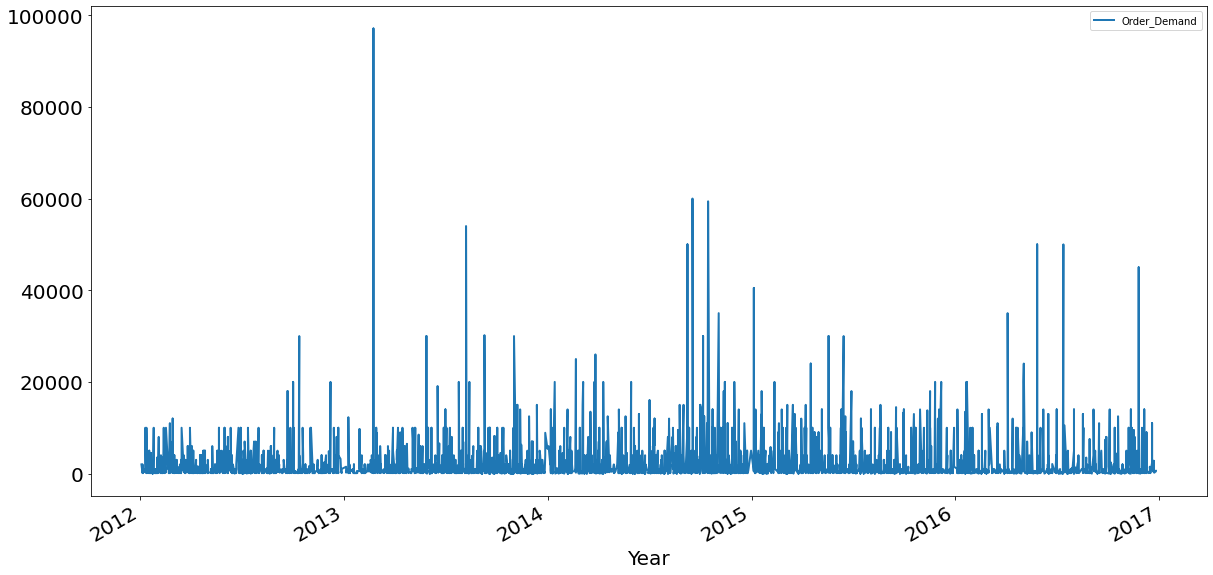

In [585]:
dfProd2.plot(figsize=(20,10), linewidth=2, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [586]:
dfProd_check=dfProd[['Order_Demand']]
dfProd2_check=dfProd2[['Order_Demand']]

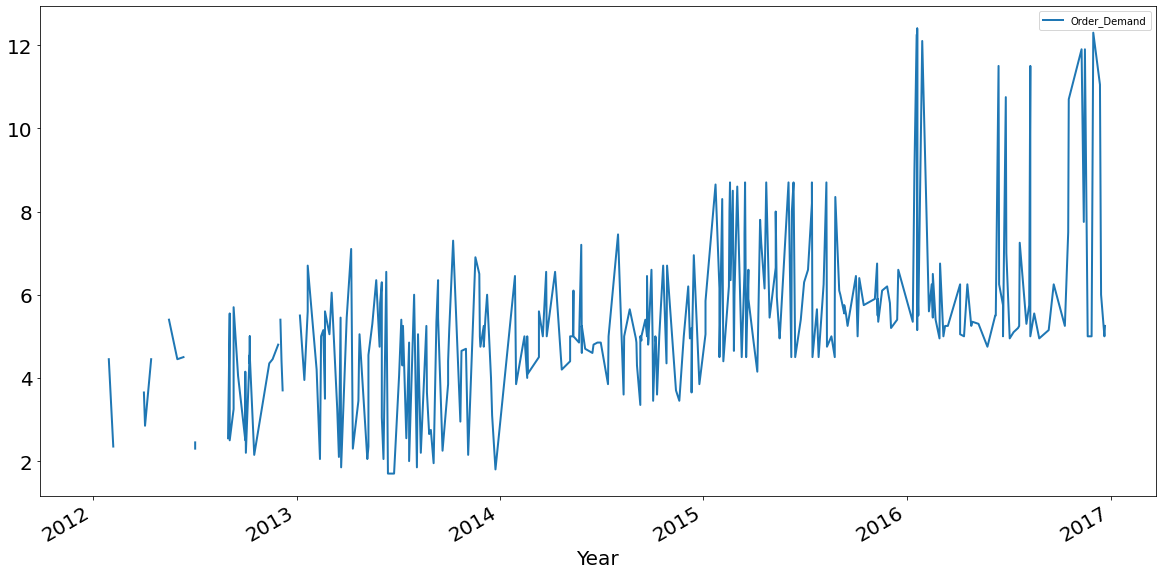

In [587]:
dfProd_check.rolling(20).mean().plot(figsize=(20,10), linewidth=2, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [588]:
result = adfuller(dfProd_check['Order_Demand'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -4.310951310856493
p-value: 0.0004252098426042608
Critical Values:
	1%: -3.450081345901191
	5%: -2.870232621465807
	10%: -2.571401168202517


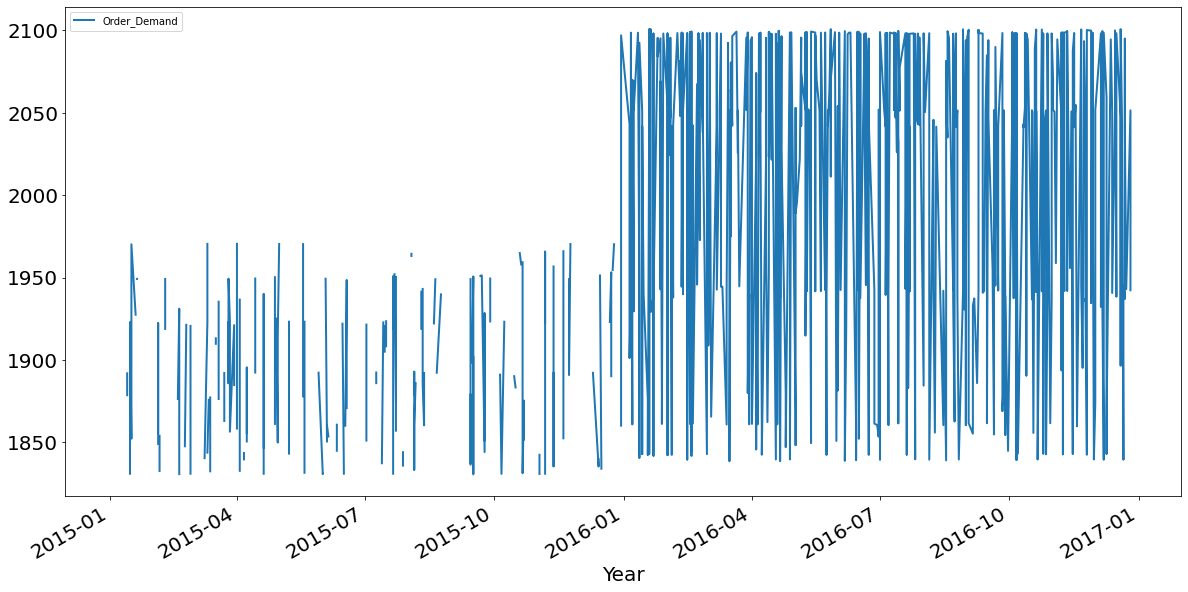

In [589]:
dfProd2_check.rolling(3000).mean().plot(figsize=(20,10), linewidth=2, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [590]:
result = adfuller(dfProd2['Order_Demand'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -11.307303787535423
p-value: 1.2639932496515664e-20
Critical Values:
	1%: -3.43203824459253
	5%: -2.8622859739495463
	10%: -2.5671670910000524


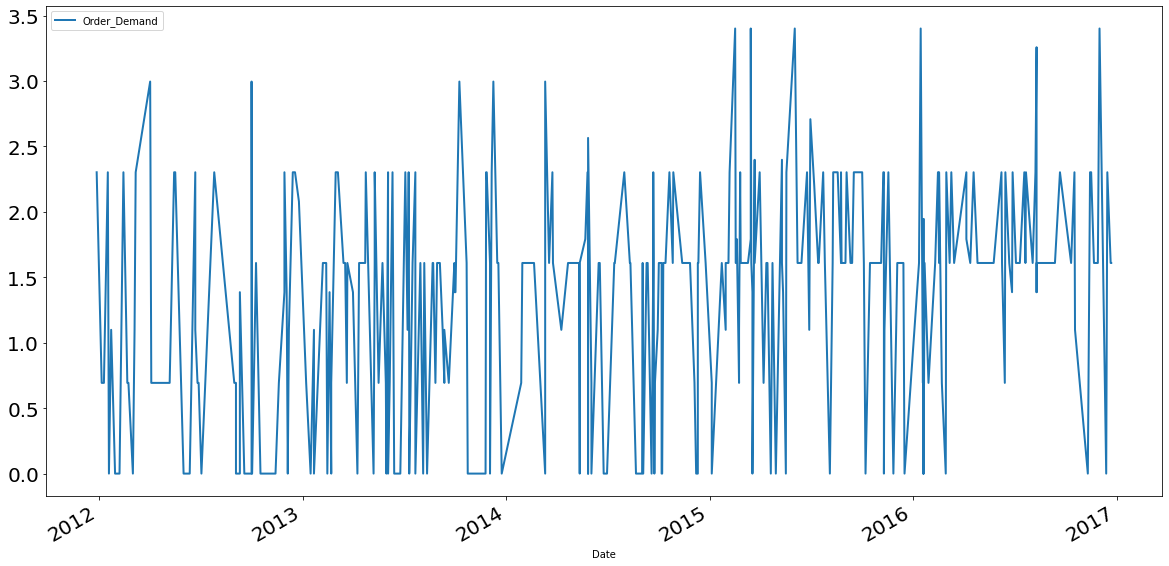

In [591]:
df_log = np.log(dfProd_check)
df_log.plot(figsize=(20,10), linewidth=2, fontsize=20)

In [592]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)

In [593]:
# ETS Decomposition 
#result = seasonal_decompose(dfProd_check['Order_Demand'], model ='multiplicative') 
  
# ETS plot  
#result.plot() 

In [594]:
df.dtypes

Product_Code         string
Warehouse            string
Product_Category     string
Order_Demand        float64
Year                  int64
Month                 int64
WeekdayName           int64
dtype: object

In [595]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [596]:
print(df.index.freq)

None


In [597]:
dfProd=dfProd.groupby(level=0).sum()

In [600]:
dfProd = dfProd.asfreq('M', method='ffill')

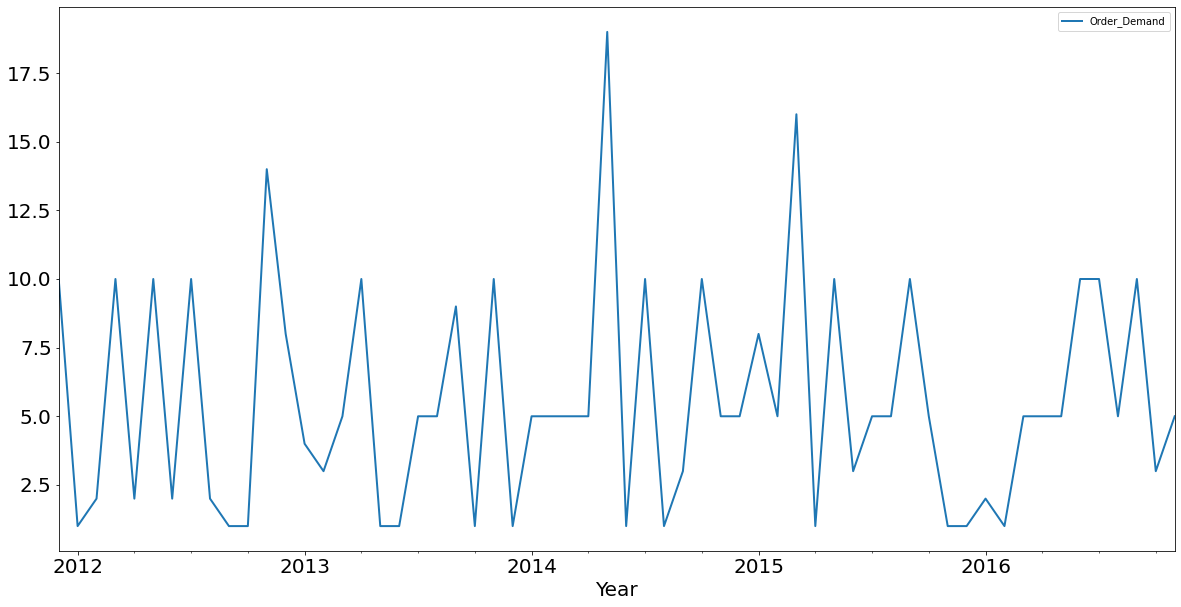

In [601]:
dfProd.plot(figsize=(20,10), linewidth=2, fontsize=20)
plt.xlabel('Year', fontsize=20);

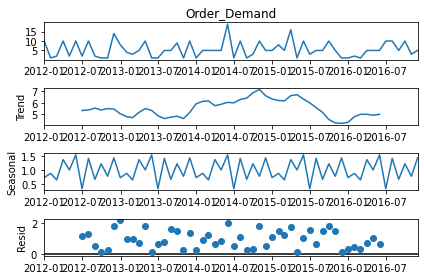

In [611]:
# ETS Decomposition 
result = seasonal_decompose(dfProd['Order_Demand'], model ='multiplicative') 
  
# ETS plot  
fig=result.plot()
fig.show()

In [614]:
# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(dfProd['Order_Demand'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=308.136, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=297.882, Time=0.08 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=295.563, Time=0.12 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=306.141, Time=0.01 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=308.805, Time=0.03 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=297.427, Time=0.12 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=297.414, Time=0.17 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=297.936, Time=0.07 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=295.620, Time=0.10 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,0,1)(0,1,1)[12]             : AIC=293.618, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   60
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -143.809
Date:                            Sun, 11 Oct 2020   AIC                            293.618
Time:                                    16:16:56   BIC                            299.232
Sample:                                         0   HQIC                           295.740
                                             - 60                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1511      0.173     -0.875      0.382      -0.490       0.187
ma.S.L12      -0.8546      0.708     -1.207      0.227      -2.242       0.533
sigma2        17.8872     11.834      1.511      0.131      -5.308      41.082
===================================================================================
Ljung-Box (Q):                       36.63   Jarque-Bera (JB):                 1.79
Prob(Q):                              0.62   Prob(JB):                         0.41
Heteroskedasticity (H):               1.26   Skew:                             0.47
Prob(H) (two-sided):                  0.65   Kurtosis:                         2.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [615]:
# Split data into train / test sets 
train = dfProd.iloc[:len(dfProd)-12] 
test = dfProd.iloc[len(dfProd)-12:] # set one year(12 months) for testing 
  
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train['Order_Demand'],  
                order = (0, 1, 1),  
                seasonal_order =(2, 1, 1, 12)) 
  
result = model.fit() 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Order_Demand   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -109.890
Date:                            Sun, 11 Oct 2020   AIC                            229.781
Time:                                    16:18:03   BIC                            237.558
Sample:                                12-31-2011   HQIC                           232.465
                                     - 11-30-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9995    101.524     -0.010      0.992    -199.984     197.985
ar.S.L12       0.4349   2.09e+05   2.08e-06      1.000    -4.1e+05     4.1e+05
ar.S.L24       0.4816   1.08e+05   4.44e-06      1.000   -2.12e+05    2.12e+05
ma.S.L12      -0.9649   2.31e+05  -4.18e-06      1.000   -4.53e+05    4.53e+05
sigma2        24.8316   5.41e+05   4.59e-05      1.000   -1.06e+06    1.06e+06
===================================================================================
Ljung-Box (Q):                       31.30   Jarque-Bera (JB):                 1.19
Prob(Q):                              0.60   Prob(JB):                         0.55
Heteroskedasticity (H):               0.93   Skew:                             0.45
Prob(H) (two-sided):                  0.90   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

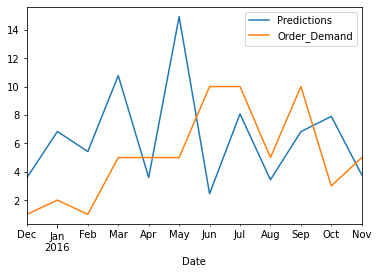

In [616]:
start = len(train) 
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set 
predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
# plot predictions and actual values 
predictions.plot(legend = True) 
test['Order_Demand'].plot(legend = True) 